## Homework

<u>MATERIAL to be able to do the homework:</u>

https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/09-serverless
<br>https://www.youtube.com/watch?v=sHQaeVm5hT8</br>


In this homework, we'll deploy the Straight vs Curly Hair Type model we trained in the
[previous homework](../08-deep-learning/homework.md).

Download the model files from here: 

* https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/hair_classifier_v1.onnx.data
* https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/hair_classifier_v1.onnx

With wget:

```bash
PREFIX="https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle"
DATA_URL="${PREFIX}/hair_classifier_v1.onnx.data"
MODEL_URL="${PREFIX}/hair_classifier_v1.onnx"
wget ${DATA_URL}
wget ${MODEL_URL}
```

In [3]:
# Define URLs in Python
PREFIX = "https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle"
DATA_URL = f"{PREFIX}/hair_classifier_v1.onnx.data"
MODEL_URL = f"{PREFIX}/hair_classifier_v1.onnx"

# Download using wget in shell, referencing Python variables
!wget "{DATA_URL}"
!wget "{MODEL_URL}"


--2025-12-07 10:27:42--  https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/hair_classifier_v1.onnx.data
Resolving github.com (github.com)... 20.26.156.215
Connecting to github.com (github.com)|20.26.156.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/426348925/398ded4a-c41c-4e5a-9672-acb7e441de54?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-07T11%3A26%3A02Z&rscd=attachment%3B+filename%3Dhair_classifier_v1.onnx.data&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-07T10%3A25%3A03Z&ske=2025-12-07T11%3A26%3A02Z&sks=b&skv=2018-11-09&sig=IDw9GEucsNIFipb%2FnWL0%2BYd3FtWFjr0BaX5f7EF02uQ%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NTEwNTA2MiwibmJmIjoxNzY1MTAzMjYyL

## Question 1

To be able to use this model, we need to know the name of the input and output nodes. 

What's the name of the output:

* `output`
* `sigmoid`
* `softmax`
* `prediction`





In [5]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 76.1 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [onnx]━━━━━━━━━━━━━ 2/3 [onnx]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
import onnx

model = onnx.load("hair_classifier_v1.onnx")

print("Inputs:")
for inp in model.graph.input:
    print("  ", inp.name)

print("\nOutputs:")
for out in model.graph.output:
    print("  ", out.name)

Inputs:
   input

Outputs:
   output


## Preparing the image

You'll need some code for downloading and resizing images. You can use 
this code:

```python
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img
```

For that, you'll need to have `pillow` installed:

```bash
pip install pillow
```

In [7]:
!pip install pillow


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

## Question 2: Target size

Let's download and resize this image: 

https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg

Based on the previous homework, what should be the target size for the image?

* 64x64
* 128x128
* 200x200
* 256x256

In [11]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 72.9 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [onnxruntime] 3/4 [onnxruntime]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [12]:
import onnxruntime

sess = onnxruntime.InferenceSession("hair_classifier_v1.onnx")
inp = sess.get_inputs()[0]
print("Expected input shape:", inp.shape)  # e.g. (1, 3, 128, 128)

Expected input shape: ['s77', 3, 200, 200]


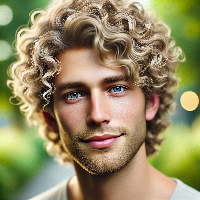

In [16]:
# Download the image
url = "https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg"
img = download_image(url)

# Prepare the image/resize
target_size = (200,200)
img_prepared = prepare_image(img, target_size)
img_prepared

## Question 3

Now we need to turn the image into numpy array and pre-process it. 

> Tip: Check the previous homework. What was the pre-processing 
> we did there?

After the pre-processing, what's the value in the first pixel, the R channel?

* -10.73
* -1.073
* 1.073
* 10.73

In [19]:
import numpy as np
from PIL import Image

# Assume img_prepared is 200x200 RGB
img_array = np.array(img_prepared).astype(np.float32) / 255.0

# Normalize using standard ImageNet mean/std
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# Apply per-channel normalization
img_array = (img_array - mean) / std

# First pixel R channel
first_pixel_r = img_array[0, 0, 0]
print(first_pixel_r)

-1.0732939435925546


## Question 4

Now let's apply this model to this image. What's the output of the model?

* 0.09
* 0.49
* 0.69
* 0.89



In [21]:
import onnxruntime as ort
import numpy as np

# Ensure img_array is float32
img_array = img_array.astype(np.float32)

# HWC -> CHW
img_array = np.transpose(img_array, (2, 0, 1))

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Load ONNX model
sess = ort.InferenceSession("hair_classifier_v1.onnx")
input_name = sess.get_inputs()[0].name

# Run inference
outputs = sess.run(None, {input_name: img_array})

# Get the output
output = outputs[0]
print("Raw model output:", output)

# Optional: get predicted class
pred_class = np.argmax(output, axis=1)
print("Predicted class index:", pred_class[0])


Raw model output: [[0.09156627]]
Predicted class index: 0


## Prepare the lambda code 

Now you need to copy all the code into a separate python file. You will 
need to use this file for the next two questions.

Tip: you can test this file locally with `ipython` or Jupyter Notebook 
by importing the file and invoking the function from this file.  


## Docker 

For the next two questions, we'll use a Docker image that we already 
prepared. This is the Dockerfile that we used for creating the image:

```docker
FROM public.ecr.aws/lambda/python:3.13

COPY hair_classifier_empty.onnx.data .
COPY hair_classifier_empty.onnx .
```

Note that it uses Python 3.13.

The docker image is published to [`agrigorev/model-2024-hairstyle:v3`](https://hub.docker.com/r/agrigorev/model-2024-hairstyle/tags).

A few notes:

* The image already contains a model and it's not the same model
  as the one we used for questions 1-4.

## Question 5

Download the base image `agrigorev/model-2025-hairstyle:v1`. You can do it with [`docker pull`](https://docs.docker.com/engine/reference/commandline/pull/).

So what's the size of this base image?

* 88 Mb
* 208 Mb
* 608 Mb
* 1208 Mb

You can get this information when running `docker images` - it'll be in the "SIZE" column.

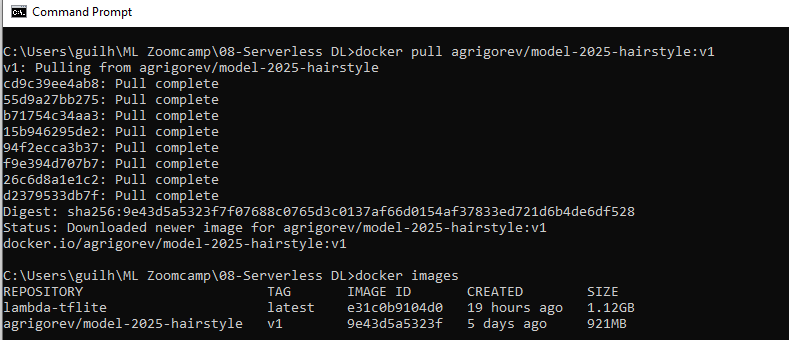

### Check the size of the Docker image

Size in bytes

[RUN IN CMD]
```
docker image inspect agrigorev/model-2025-hairstyle:v1 --format='{{.Size}}'
```
Size in Mega bytes

[RUN IN CMD]
```
powershell -command "[math]::Round(($(docker image inspect agrigorev/model-2025-hairstyle:v1 --format='{{.Size}}') / 1MB), 2)"
```

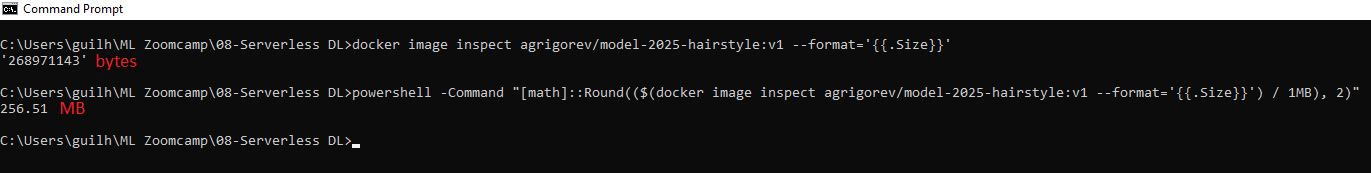

[RUN IN CMD]
```
docker history agrigorev/model-2025-hairstyle:v1
```

The bottom-most layer (oldest) is usually the base image.

The SIZE column shows how much each layer contributes.

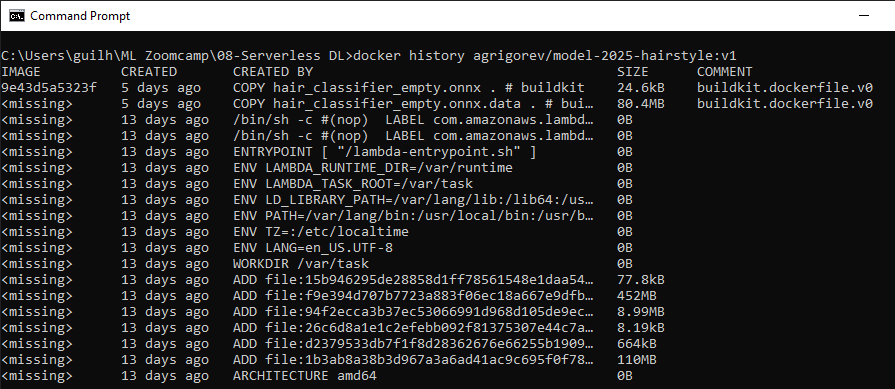

### **1️⃣ Calculating the base image size**

* **Total image size** (from `docker images`): 921 MB
* **Unique layers added by your image** (from `docker inspect .Size`): 256.51 MB

Subtract to get the **base image size**:

[
\text{Base image size} = 921 - 256.51 \approx 664.49 \text{ MB} \approx 664 \text{ MB}
]

✅ This shows the base image contributes roughly **664 MB**.

* The total size reported by `docker images` includes **your layers + the base image layers**.
* The size from `docker inspect .Size` includes **only the layers you added**, which is why it’s smaller.

**Formula:**

[
\text{Image size (docker images)} \approx \text{Your image layers} + \text{Base image layers}
]

---

### **2️⃣ Structure of the image (from `docker history`)**

The layers added by the image are visible in `docker history`:

| Layer size | Layer action                         |
| ---------- | ------------------------------------ |
| 24.6 kB    | COPY hair_classifier_empty.onnx      |
| 80.4 MB    | COPY hair_classifier_empty.onnx.data |
| 77.8 kB    | ADD some file                        |
| 452 MB     | ADD large file                       |
| 8.99 MB    | ADD file                             |
| 8.19 kB    | ADD file                             |
| 664 kB     | ADD file                             |
| 110 MB     | ADD file                             |

* The **sum of these layers ≈ 256 MB**, which matches `docker inspect .Size`.
* The **rest of the 921 MB (≈664 MB)** comes from the **base image layers**, which are inherited from the underlying Lambda base image.
* Small 0B layers represent metadata (`ENV`, `ENTRYPOINT`, `LABEL`, `WORKDIR`) and don’t add size.

---

### **3️⃣ Key takeaway**

* `docker images` → shows **total size on disk**, including base image layers.
* `docker inspect .Size` → shows **only the unique layers of your image**.
* `docker history` → breaks down **all layers**, showing which layers contribute most to the image size.

✅ So image is structured as:

**Base image (~664 MB) + Your added layers (~256 MB) = Total 921 MB**

* Largest layers added: 452 MB, 110 MB, 80.4 MB.
* Small layers are mostly metadata.


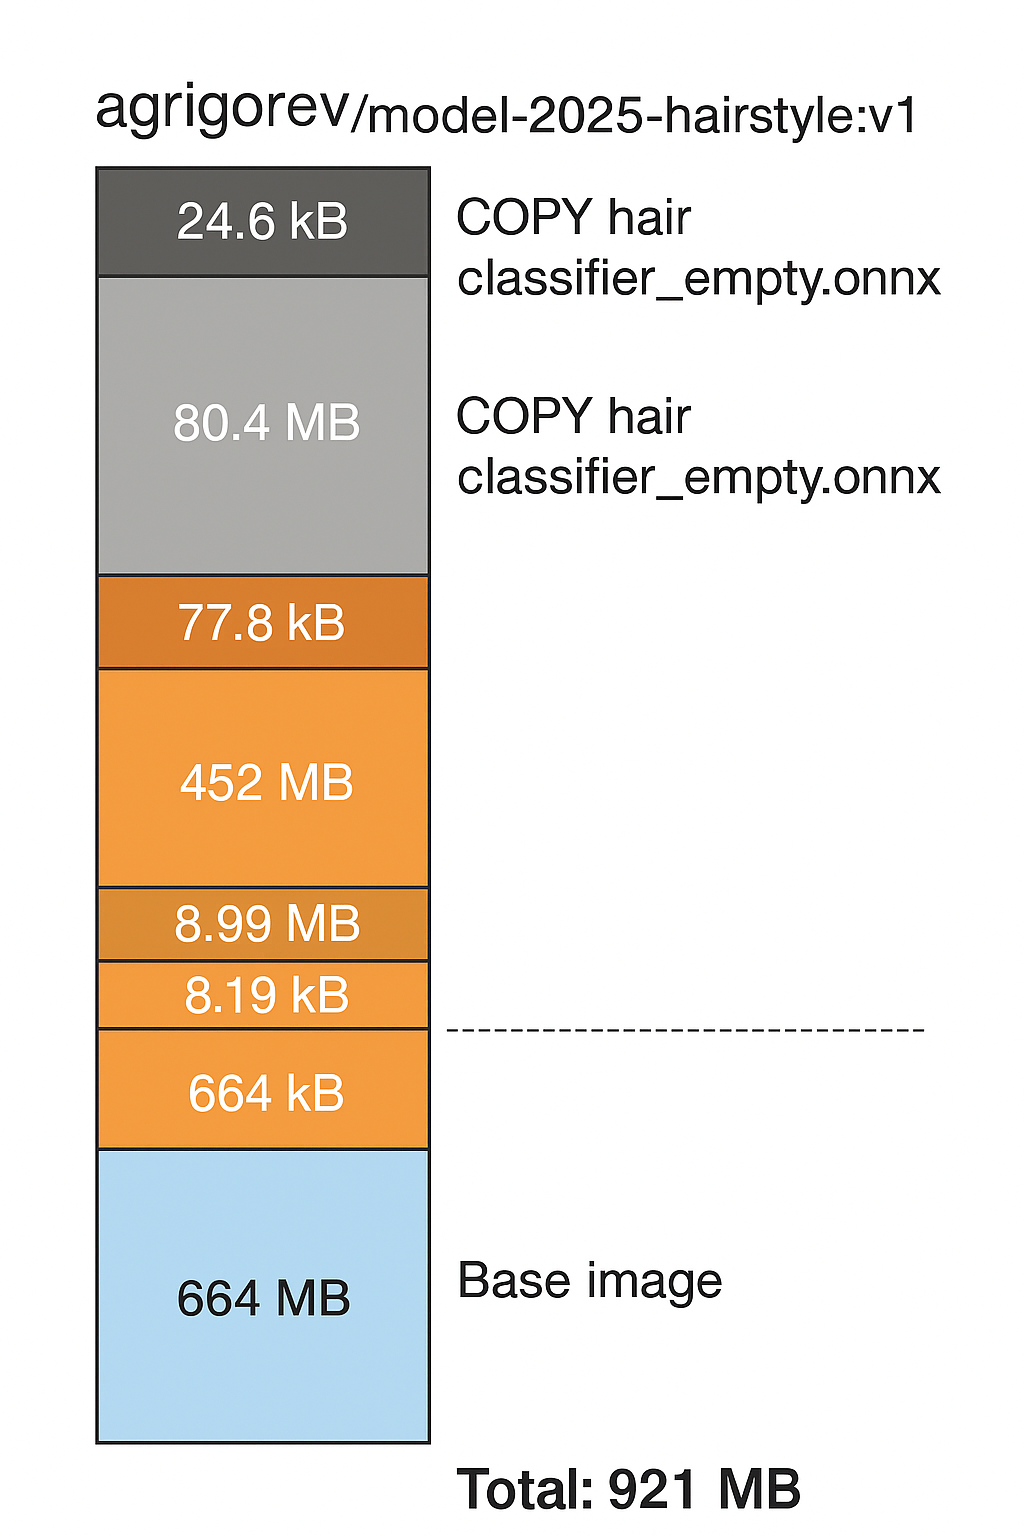

## Question 6

Now let's extend this docker image, install all the required libraries
and add the code for lambda.

You don't need to include the model in the image. It's already included. 
The name of the file with the model is `hair_classifier_empty.onnx` and it's 
in the current workdir in the image (see the Dockerfile above for the 
reference). 
The provided model requires the same preprocessing for images regarding target size and rescaling the value range than used in homework 8.

Now run the container locally.

Score this image: https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg

What's the output from the model?

* -1.0
* -0.10
* 0.10
* 1.0

## Publishing it to AWS

Now you can deploy your model to AWS!

* Publish your image to ECR
* Create a lambda function in AWS, use the ECR image
* Give it more RAM and increase the timeout 
* Test it
* Expose the lambda function using API Gateway

This is optional and not graded.


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw09
* If your answer doesn't match options exactly, select the closest one. If the answer is exactly in between two options, select the higher value.

## Publishing to Docker hub

Just for the reference, this is how we published our image to Docker hub:

```bash
docker build -t model-2025-hairstyle -f homework.dockerfile .
docker tag model-2025-hairstyle:latest agrigorev/model-2025-hairstyle:v1
docker push agrigorev/model-2025-hairstyle:v1
```

(You don't need to execute this code)